# <span style="color:blue">

I. Preprocessing
- Xử lý nan values, giá trị không hợp lệ
- Thay đổi data types
- Chuẩn hóa data
- Xử lý Imbalanced data: Undersampling
- Chia tập train, test

II. Model
- Logistic Regression
- Gaussian Naive Bayes
- SVM
- Decision Tree
- Random Forest
- Boosting: AdaBoost, Gradient Boosting, XGBoost

III. Đánh giá

</span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **I. PREPROCESSING**

In [2]:
df = pd.read_csv('/content/waterQuality1.csv')

In [3]:
df.head() 

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


Data bao gồm 21 cột, thông tin các cột như sau:

*   1 - 20: Hàm lượng các chất trong nước
*   21: Đánh giá chất lượng nước (1 - An toàn; 0 - Không an toàn)

1. aluminium - dangerous if greater than 2.8
2. ammonia - dangerous if greater than 32.5
3. arsenic - dangerous if greater than 0.01
4. barium - dangerous if greater than 2
5. cadmium - dangerous if greater than 0.005
6. chloramine - dangerous if greater than 4
7. chromium - dangerous if greater than 0.1
8. copper - dangerous if greater than 1.3
9. flouride - dangerous if greater than 1.5
10. bacteria - dangerous if greater than 0
11. viruses - dangerous if greater than 0
12. lead - dangerous if greater than 0.015
13. nitrates - dangerous if greater than 10
14. nitrites - dangerous if greater than 1
15. mercury - dangerous if greater than 0.002
16. perchlorate - dangerous if greater than 56
17. radium - dangerous if greater than 5
18. selenium - dangerous if greater than 0.5
19. silver - dangerous if greater than 0.1
20. uranium - dangerous if greater than 0.3
21. is_safe - class attribute {0 - not safe, 1 - safe}

In [4]:
# check thông tin dataset và dạng dữ liệu của từng cột
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [5]:
df.loc[[7551, 7568,7890],'ammonia']

7551    #NUM!
7568    #NUM!
7890    #NUM!
Name: ammonia, dtype: object

In [6]:
df.loc[[7551, 7568,7890],'is_safe']

7551    #NUM!
7568    #NUM!
7890    #NUM!
Name: is_safe, dtype: object

In [7]:
# Loại bỏ các dòng có data không hợp lệ
df.drop([7551,7568,7890],axis=0,inplace=True)

In [8]:
# Thay đổi data type
df['ammonia']=df['ammonia'].astype('float64')
df['is_safe']=df['is_safe'].astype('int64')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [10]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.6/22.6 MB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 95.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 10.0 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=345992 sha256=c99cd642915303afebf3851813af7c3f27155f28c8133faba881a61fb7124a4b
  Stored in directory: /tmp/pip-ephem-wheel-cache-ey74ebp9/wheels/43/c8/f4/c0ebc32d7f20fe89d0e92d90eaeef5f0c0594a89b6bc16b352
Successfully built ydata-profiling
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successf

In [11]:
from pandas_profiling import ProfileReport

<ipython-input-11-e2a33329b6f0>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [12]:
profile = ProfileReport(df, title="EDA dataset")
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [13]:
#Visualization
profile

Output hidden; open in https://colab.research.google.com to view.

In [14]:
num_col=[]
for col in df.select_dtypes(exclude='object'):
    if(col!='is_safe'):
        print(f"{col:30} ----> {df[col].nunique():10} unique values")
        num_col.append(col)

aluminium                      ---->        495 unique values
ammonia                        ---->       2563 unique values
arsenic                        ---->        107 unique values
barium                         ---->        480 unique values
cadmium                        ---->         23 unique values
chloramine                     ---->        812 unique values
chromium                       ---->         91 unique values
copper                         ---->        201 unique values
flouride                       ---->        151 unique values
bacteria                       ---->        101 unique values
viruses                        ---->         61 unique values
lead                           ---->        200 unique values
nitrates                       ---->       1803 unique values
nitrites                       ---->        280 unique values
mercury                        ---->         11 unique values
perchlorate                    ---->       2999 unique values
radium  

## BALANCING DATA: UNDERSAMPLING

In [15]:
features = df.drop(['is_safe'], axis=1)
X = np.asanyarray(features)
X

array([[1.650e+00, 9.080e+00, 4.000e-02, ..., 8.000e-02, 3.400e-01,
        2.000e-02],
       [2.320e+00, 2.116e+01, 1.000e-02, ..., 8.000e-02, 2.700e-01,
        5.000e-02],
       [1.010e+00, 1.402e+01, 4.000e-02, ..., 7.000e-02, 4.400e-01,
        1.000e-02],
       ...,
       [9.000e-02, 6.850e+00, 0.000e+00, ..., 0.000e+00, 4.000e-02,
        5.000e-02],
       [1.000e-02, 1.000e+01, 1.000e-02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [4.000e-02, 6.850e+00, 1.000e-02, ..., 0.000e+00, 4.000e-02,
        5.000e-02]])

In [16]:
y = np.asanyarray(df['is_safe'])
y

array([1, 1, 0, ..., 1, 1, 1])

In [17]:
# Chuẩn hóa data
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

ohe = OneHotEncoder(drop='first',handle_unknown='ignore')

ms,ss=MinMaxScaler(),StandardScaler()

ct=ColumnTransformer([
    ('num_encoder',ss,make_column_selector(dtype_include='float64'))
    ],remainder='passthrough',verbose=True)

In [18]:
df['is_safe'].value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

<Axes: ylabel='is_safe'>

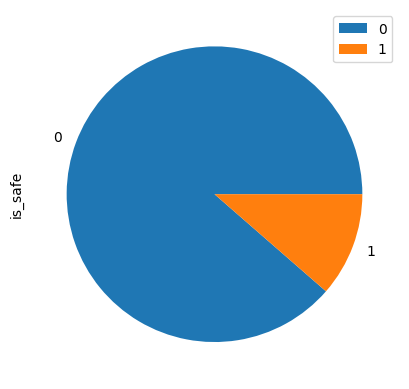

In [19]:
df['is_safe'].value_counts().plot.pie(legend = ["0", "1"])

In [20]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
#Load lại data của X và y từ bảng data gốc
y = df["is_safe"].values
X=df.iloc[:, :-1].values

In [22]:
from imblearn.under_sampling import NearMiss
NearMiss_Model=NearMiss(version=2) # Chúng ta có 3 phương pháp NearMiss 1,2,3
X_under, y_under=NearMiss_Model.fit_resample(X,y)
X_under.shape, y_under.shape #Kích thước của X và y đã được lấy mẫu lại

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f84bbd3dd30>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 842, in __init__
    super().__init__(**kwargs)
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 810, in __init__
    self._dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.9/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


((1824, 20), (1824,))

* Tạo tập train và tập test

In [23]:
# Chia tập train, test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1459, 20) (1459,)
Test set: (365, 20) (365,)


# **II. MODELS**

## **1. LOGISTIC REGRESSION**


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [25]:
yhat = LR.predict(X_test)
yhat

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,

In [26]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.55753636, 0.44246364],
       [0.32249789, 0.67750211],
       [0.68757145, 0.31242855],
       [0.77020258, 0.22979742],
       [0.61261744, 0.38738256],
       [0.46837043, 0.53162957],
       [0.48543781, 0.51456219],
       [0.37406885, 0.62593115],
       [0.80449577, 0.19550423],
       [0.65643112, 0.34356888],
       [0.63186448, 0.36813552],
       [0.64707149, 0.35292851],
       [0.80635757, 0.19364243],
       [0.33050735, 0.66949265],
       [0.40207848, 0.59792152],
       [0.73144792, 0.26855208],
       [0.74657593, 0.25342407],
       [0.18421514, 0.81578486],
       [0.62158202, 0.37841798],
       [0.76043917, 0.23956083],
       [0.66497175, 0.33502825],
       [0.6552568 , 0.3447432 ],
       [0.29272895, 0.70727105],
       [0.65029357, 0.34970643],
       [0.56452638, 0.43547362],
       [0.33062282, 0.66937718],
       [0.54283388, 0.45716612],
       [0.52209924, 0.47790076],
       [0.45562829, 0.54437171],
       [0.78591754, 0.21408246],
       [0.

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[0,1]))

[[158  31]
 [ 52 124]]


Confusion matrix
[[158  31]
 [ 52 124]]


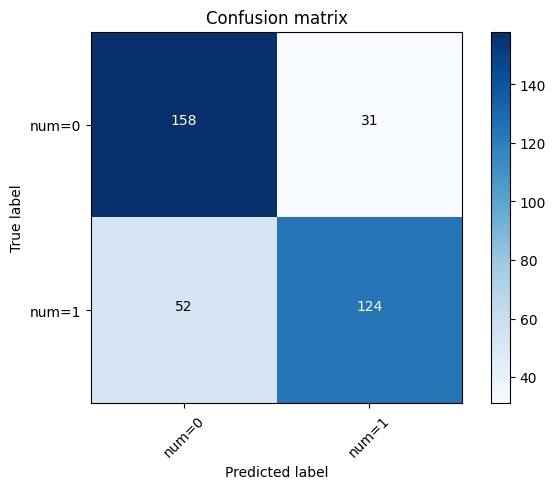

In [28]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['num=0','num=1'],normalize= False,  title='Confusion matrix')

In [29]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.553219344073096

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       189
           1       0.80      0.70      0.75       176

    accuracy                           0.77       365
   macro avg       0.78      0.77      0.77       365
weighted avg       0.78      0.77      0.77       365



In [31]:
y_pred_lr = LR.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_lr)
print("Accuracy of Logistic Regression model is:", 100 * accuracy_score(y_test, y_pred_lr),'%')

Accuracy of Logistic Regression model is: 77.26027397260275 %


## **2. GAUSSIAN NAIVE BAYES** 

In [33]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)

In [34]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       189
           1       0.77      0.84      0.80       176

    accuracy                           0.80       365
   macro avg       0.80      0.80      0.80       365
weighted avg       0.81      0.80      0.80       365



In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_gnb)

0.8027397260273973

In [36]:
print("Accuracy of GNB model is:", 100 * accuracy_score(y_test, y_pred_gnb),'%')

Accuracy of GNB model is: 80.27397260273973 %


## **3. SVM**

In [37]:
from sklearn import svm

In [38]:
clf = svm.SVC(kernel='rbf') # Linear Kernel 
clf.fit(X_train, y_train)

SVC()

In [39]:
y_pred_svm = clf.predict(X_test)

In [40]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86       189
           1       0.96      0.69      0.81       176

    accuracy                           0.84       365
   macro avg       0.87      0.83      0.83       365
weighted avg       0.86      0.84      0.83       365



In [41]:
from sklearn import metrics
print("Accuracy of SVM is:", 100 * metrics.accuracy_score(y_test, y_pred_svm),'%')


Accuracy of SVM is: 83.83561643835617 %


## **4. DECISION TREE**

In [42]:
from sklearn import tree
from sklearn.datasets import load_iris

In [43]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

[Text(0.6202831827658096, 0.98, 'aluminium <= 0.405\ngini = 0.202\nsamples = 7996\nvalue = [7084, 912]\nclass = 0'),
 Text(0.3575225851285615, 0.94, 'aluminium <= 0.115\ngini = 0.086\nsamples = 6163\nvalue = [5886, 277]\nclass = 0'),
 Text(0.2394718554551772, 0.9, 'viruses <= 0.505\ngini = 0.068\nsamples = 5538\nvalue = [5344, 194]\nclass = 0'),
 Text(0.17220291869353718, 0.86, 'nitrites <= 1.045\ngini = 0.102\nsamples = 3054\nvalue = [2890, 164]\nclass = 0'),
 Text(0.1182765809589993, 0.82, 'nitrates <= 10.005\ngini = 0.2\nsamples = 1031\nvalue = [915, 116]\nclass = 0'),
 Text(0.09492703266157053, 0.78, 'bacteria <= 0.015\ngini = 0.341\nsamples = 477\nvalue = [373, 104]\nclass = 0'),
 Text(0.0838082001389854, 0.74, 'lead <= 0.149\ngini = 0.421\nsamples = 315\nvalue = [220, 95]\nclass = 0'),
 Text(0.07936066712995135, 0.7, 'copper <= 1.275\ngini = 0.471\nsamples = 250\nvalue = [155, 95]\nclass = 0'),
 Text(0.07491313412091731, 0.66, 'barium <= 2.015\ngini = 0.488\nsamples = 225\nvalue 

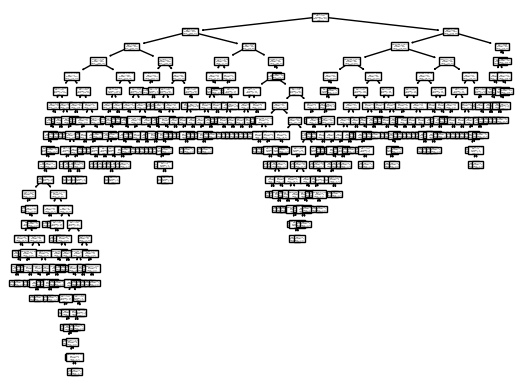

In [44]:
tree.plot_tree(clf,feature_names=['aluminium','ammonia','arsenic','barium','cadmium','chloramine','chromium','copper','flouride','bacteria','viruses','lead','nitrates','nitrites','mercury','perchlorate','radium','selenium','silver','uranium'], class_names=['0','1'])

In [45]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [46]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=4)
decision_tree = decision_tree.fit(X, y)
r = export_text(decision_tree, feature_names=['aluminium','ammonia','arsenic','barium','cadmium','chloramine','chromium','copper','flouride','bacteria','viruses','lead','nitrates','nitrites','mercury','perchlorate','radium','selenium','silver','uranium'])
print(r)

|--- aluminium <= 0.41
|   |--- aluminium <= 0.11
|   |   |--- viruses <= 0.50
|   |   |   |--- nitrites <= 1.04
|   |   |   |   |--- class: 0
|   |   |   |--- nitrites >  1.04
|   |   |   |   |--- class: 0
|   |   |--- viruses >  0.50
|   |   |   |--- chloramine <= 1.10
|   |   |   |   |--- class: 0
|   |   |   |--- chloramine >  1.10
|   |   |   |   |--- class: 0
|   |--- aluminium >  0.11
|   |   |--- silver <= 0.11
|   |   |   |--- uranium <= 0.03
|   |   |   |   |--- class: 1
|   |   |   |--- uranium >  0.03
|   |   |   |   |--- class: 0
|   |   |--- silver >  0.11
|   |   |   |--- cadmium <= 0.01
|   |   |   |   |--- class: 0
|   |   |   |--- cadmium >  0.01
|   |   |   |   |--- class: 0
|--- aluminium >  0.41
|   |--- cadmium <= 0.01
|   |   |--- perchlorate <= 35.06
|   |   |   |--- perchlorate <= 23.36
|   |   |   |   |--- class: 1
|   |   |   |--- perchlorate >  23.36
|   |   |   |   |--- class: 1
|   |   |--- perchlorate >  35.06
|   |   |   |--- ammonia <= 10.76
|   |   |  

In [47]:
import graphviz

In [48]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Water_quality")

'Water_quality.pdf'

In [49]:
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=['aluminium','ammonia','arsenic','barium','cadmium','chloramine','chromium','copper','flouride','bacteria','viruses','lead','nitrates','nitrites','mercury','perchlorate','radium','selenium','silver','uranium'],class_names=['0','1'],filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  

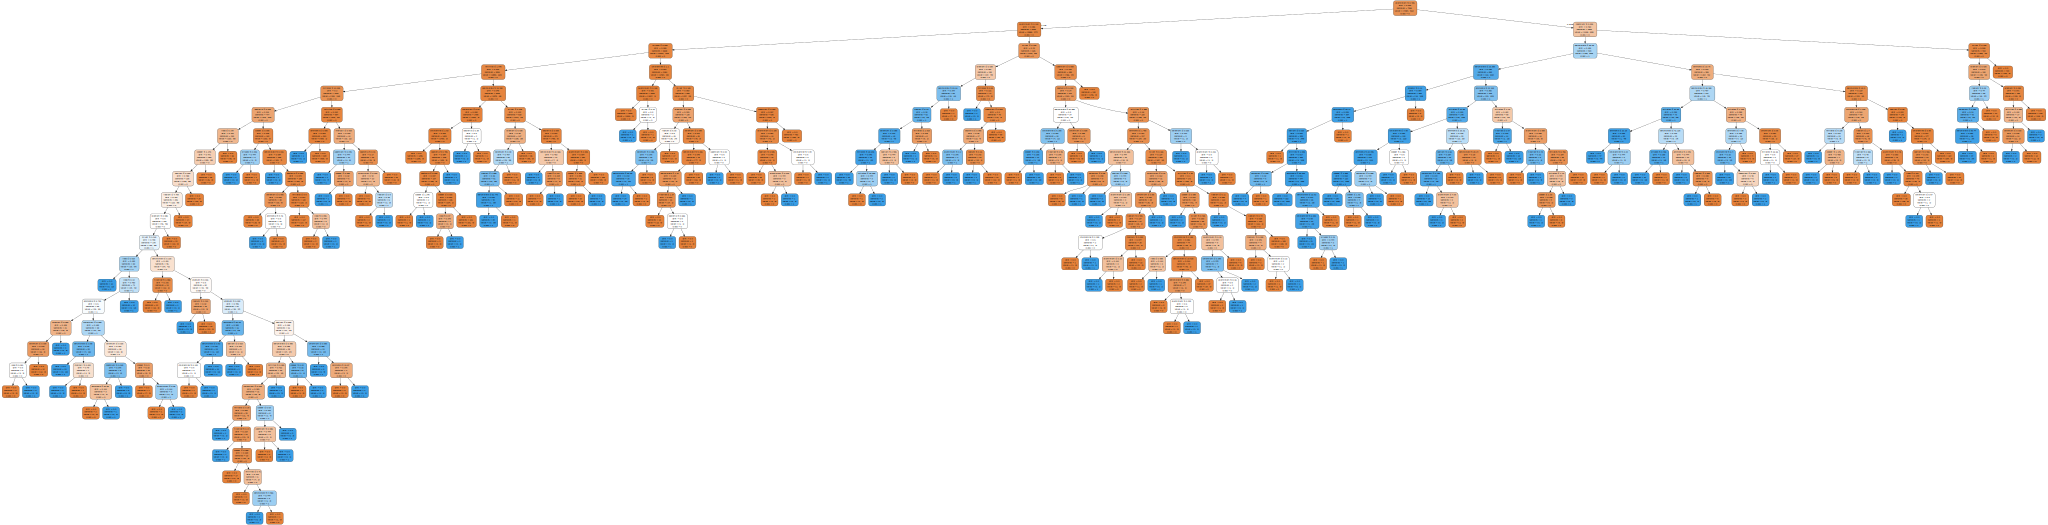

In [50]:
graph

In [51]:
WaterTree = DecisionTreeClassifier(criterion="entropy")
WaterTree.fit(X_train, y_train)
predTree = WaterTree.predict(X_test)

In [52]:
print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       189
           1       0.93      0.97      0.95       176

    accuracy                           0.95       365
   macro avg       0.95      0.95      0.95       365
weighted avg       0.95      0.95      0.95       365



In [53]:
y_pred_dt = predTree

In [54]:
accuracy_score(y_test, y_pred_dt)

0.9506849315068493

In [55]:
print("Accuracy of Decision Tree is:", 100 * accuracy_score(y_test, y_pred_dt), '%')

Accuracy of Decision Tree is: 95.06849315068493 %


## **5. RANDOM FOREST**

In [56]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':y_pred_rf}) # Is_safe 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_rfc = score
out_rfc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rf))

Training Score: 1.0
Testing Score: 0.9698630136986301
   Predicted
0          1
1          1
2          0
3          0
4          0
% of people predicted with heart-disease: 0.5013698630136987
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       189
           1       0.95      0.99      0.97       176

    accuracy                           0.97       365
   macro avg       0.97      0.97      0.97       365
weighted avg       0.97      0.97      0.97       365



In [57]:
print("Accuracy of Random Forest is:", 100 * accuracy_score(y_test, y_pred_rf), '%')

Accuracy of Random Forest is: 96.98630136986301 %


## **6. BOOSTING**


In [58]:
print("Accuracy of LR is:", 100 * accuracy_score(y_test, y_pred_lr), '%')
print("Accuracy of GNB is:", 100 * accuracy_score(y_test, y_pred_gnb), '%')
print("Accuracy of SVM is:", 100 * metrics.accuracy_score(y_test, y_pred_svm), '%')
print("Accuracy of Decision Tree is:", 100 * accuracy_score(y_test, y_pred_dt), '%')
print("Accuracy of Random Forest is:", 100 * accuracy_score(y_test, y_pred_rf), '%')


Accuracy of LR is: 77.26027397260275 %
Accuracy of GNB is: 80.27397260273973 %
Accuracy of SVM is: 83.83561643835617 %
Accuracy of Decision Tree is: 95.06849315068493 %
Accuracy of Random Forest is: 96.98630136986301 %


Mô hình Random Forest đạt độ chính xác cao nhất (96,9863%) 
--> chọn mô hình này để chạy các mô hình boost

In [59]:
#check mối tương quan của các features với biến target
df_corr = df.corr()
df_corr

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
aluminium,1.000000,0.067369,0.225725,0.294091,-0.099902,0.369221,0.353134,0.168569,-0.009877,-0.078324,...,0.020957,-0.003851,0.237439,-0.003129,0.362986,0.243396,-0.003651,0.334923,0.014723,0.333974
ammonia,0.067369,1.000000,0.046783,0.070099,-0.006422,0.104775,0.124782,0.015953,-0.028221,0.063603,...,-0.037065,0.006483,-0.063309,0.020884,0.090928,0.050401,0.029897,0.075547,0.014635,-0.022919
arsenic,0.225725,0.046783,1.000000,0.362925,0.334782,0.356509,0.312421,-0.036488,0.003731,0.035642,...,-0.087669,0.027533,0.305113,-0.015288,0.332228,0.218328,-0.006993,0.307794,0.001469,-0.123362
barium,0.294091,0.070099,0.362925,1.000000,-0.037901,0.446869,0.415937,0.065277,-0.018637,0.101304,...,-0.042829,-0.011423,0.312783,0.006165,0.462207,0.286890,0.035222,0.431542,-0.002541,0.090858
cadmium,-0.099902,-0.006422,0.334782,-0.037901,1.000000,-0.144366,-0.157716,-0.109252,0.005005,-0.092133,...,-0.035313,0.020232,-0.015829,-0.016169,-0.149269,-0.098936,0.009933,-0.155441,-0.005911,-0.256034
chloramine,0.369221,0.104775,0.356509,0.446869,-0.144366,1.000000,0.555846,0.118975,0.004254,0.154443,...,-0.030241,-0.001619,0.379916,-0.021198,0.588683,0.389119,0.011435,0.522372,-0.007648,0.186704
chromium,0.353134,0.124782,0.312421,0.415937,-0.157716,0.555846,1.000000,0.113003,-0.002424,0.141937,...,-0.050254,-0.012843,0.335940,-0.022541,0.524432,0.315484,0.030598,0.510705,-0.005472,0.182306
copper,0.168569,0.015953,-0.036488,0.065277,-0.109252,0.118975,0.113003,1.000000,0.011647,0.149271,...,0.121762,0.002259,0.162092,0.017785,0.104527,0.026534,-0.003356,0.089241,0.006802,0.029498
flouride,-0.009877,-0.028221,0.003731,-0.018637,0.005005,0.004254,-0.002424,0.011647,1.000000,0.013984,...,0.012146,-0.008245,-0.016591,-0.004263,-0.016352,0.007683,0.022726,0.014446,0.016849,0.006550
bacteria,-0.078324,0.063603,0.035642,0.101304,-0.092133,0.154443,0.141937,0.149271,0.013984,1.000000,...,-0.027179,-0.033993,0.246463,-0.004406,0.147526,0.099080,-0.006779,0.148199,0.045077,-0.022077


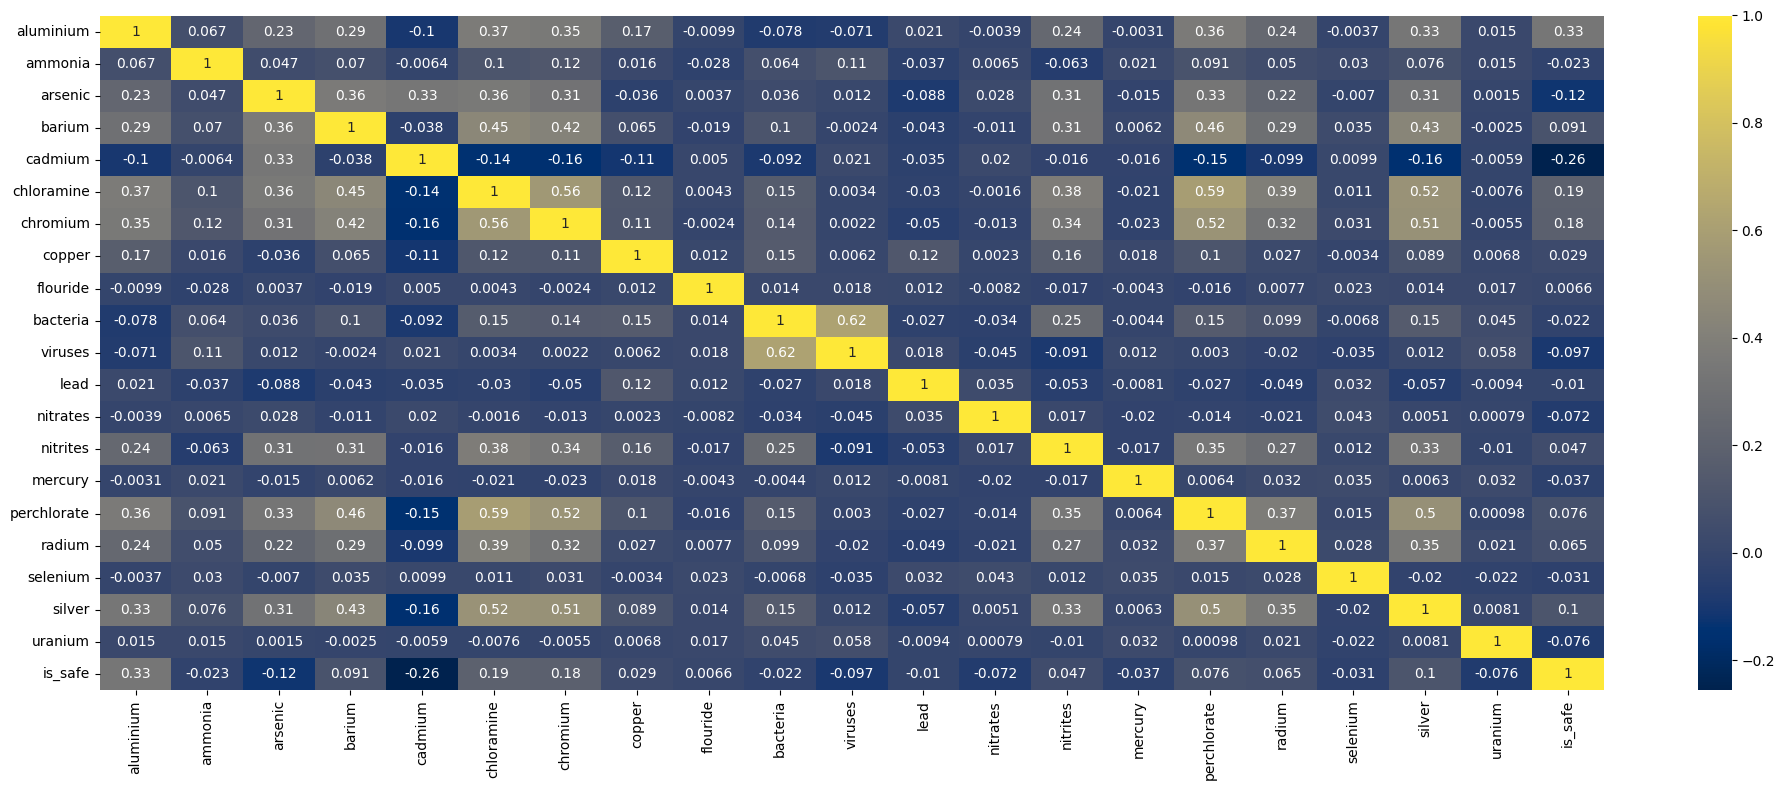

In [60]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),cmap='cividis',annot=True)
plt.tight_layout()

Các features tương quan mạnh với biến target 'is_safe' lần lượt là 'aluminium'; 'arsenic'; 'cadmium'; 'chloramine'; 'chromium'; 'silver'

In [61]:
features2 = df[['aluminium', 'arsenic', 'cadmium', 'chloramine', 'chromium','silver']]

In [62]:
X2 = np.asanyarray(features2)
X2

array([[1.65e+00, 4.00e-02, 7.00e-03, 3.50e-01, 8.30e-01, 3.40e-01],
       [2.32e+00, 1.00e-02, 2.00e-03, 5.28e+00, 6.80e-01, 2.70e-01],
       [1.01e+00, 4.00e-02, 8.00e-03, 4.24e+00, 5.30e-01, 4.40e-01],
       ...,
       [9.00e-02, 0.00e+00, 3.00e-02, 5.00e-02, 5.00e-02, 4.00e-02],
       [1.00e-02, 1.00e-02, 0.00e+00, 2.00e+00, 0.00e+00, 0.00e+00],
       [4.00e-02, 1.00e-02, 3.00e-02, 5.00e-02, 1.00e-02, 4.00e-02]])

In [63]:
y2 = np.asanyarray(df['is_safe'])
y2

array([1, 1, 0, ..., 1, 1, 1])

In [64]:
df['is_safe'].value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

In [65]:
from sklearn import preprocessing
X2 = preprocessing.StandardScaler().fit(X2).transform(X2)

In [66]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=4)
print ('Train set:', X2_train.shape,  y2_train.shape)
print ('Test set:', X2_test.shape,  y2_test.shape)

Train set: (6396, 6) (6396,)
Test set: (1600, 6) (1600,)


* Undersampling

In [67]:
from imblearn.under_sampling import NearMiss
NearMiss_Model=NearMiss(version=2) # Chúng ta có 3 phương pháp NearMiss 1,2,3
X2_under, y2_under=NearMiss_Model.fit_resample(X2,y2)
X2_under.shape, y2_under.shape #Kích thước của X2 và y2 đã được lấy mẫu lại

((1824, 6), (1824,))

In [69]:
# Chia lại tập train, test
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_under, y2_under, test_size=0.2, random_state=4)
print ('Train set:', X2_train.shape,  y2_train.shape)
print ('Test set:', X2_test.shape,  y2_test.shape)

Train set: (1459, 6) (1459,)
Test set: (365, 6) (365,)


* Chạy lại mô hình Random Forest sau khi cân bằng data

In [70]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
model.fit(X2_train, y2_train)
y_pred_rf = model.predict(X2_test)
score = model.score(X2_train, y2_train)
print('Training Score:', score)
score = model.score(X2_test, y2_test)
print('Testing Score:', score)

Training Score: 1.0
Testing Score: 0.9205479452054794


In [71]:
y2_pred_rf = model.predict(X2_test)

In [72]:
print(classification_report(y2_test, y2_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       189
           1       0.88      0.97      0.92       176

    accuracy                           0.92       365
   macro avg       0.92      0.92      0.92       365
weighted avg       0.92      0.92      0.92       365



In [73]:
print("Accuracy of RF after being balanced is:", 100 * metrics.accuracy_score(y2_test, y2_pred_rf),'%')

Accuracy of RF after being balanced is: 92.05479452054794 %


AdaBoost

In [74]:
from sklearn.ensemble import AdaBoostClassifier

In [75]:
model = AdaBoostClassifier(random_state=1)
model.fit(X2_train, y2_train)
accuracy = model.score(X2_test, y2_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 84.11%


Gradient Boosting

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

In [77]:
model = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(X2_train, y2_train)
accuracy = model.score(X2_test, y2_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 82.47%


XGBoost

In [78]:
import xgboost as xgb

In [79]:
model = xgb.XGBClassifier(random_state=1, eta=0.01)
model.fit(X2_train, y2_train)
accuracy = model.score(X2_test, y2_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 88.77%


# **III. CONCLUSION**

| Model    | Accuracy|
|-------------------|----------------|
| Logistic Regresion |77.26% |
| Gaussian Naive Bayes     |80.27% |
| SVM | 83.84%|
| Decision Tree | 95.34%|
| Random Forest | 96.98%|
|Adaboost | 84.11%|
|Gradient Boosting | 82.47%|
|XGBoost| 88.77% |